# Understanding and exploring the features present in the dataset

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv("/Users/vinatigattupalli/Documents/Datasets/MergedDataset.csv",low_memory=False)

In [4]:
df.shape

(14101, 588)

## Function for payload columns

In [5]:
def payload(df):
    payload_col = [col for col in df if col.startswith('pay')]
    df[payload_col]
    print("The payload cols are {}".format(len(payload_col)))
    return payload_col
    

In [6]:
payload_col=payload(df)

The payload cols are 538


## Function for non payload columns

In [7]:
def non_payload(df):
    payload_col = [col for col in df if col.startswith('pay')]
    non_payload_col=set(df.columns)-set(payload_col)
    non_payload_col=list(non_payload_col)
    print("The non payload cols are {}".format(len(non_payload_col)))
    return non_payload_col


## In the given dataset we have 538 columns out of 588 columns are payload

In [164]:
non_payload_col=non_payload(df)
df[non_payload_col]


The non payload cols are 23


actor_login repository_master_branch  \
0       errantepiphany                   master   
1             cweybrec                   master   
2                 4poc                   master   
3           hvorragend                   master   
4          cs0rbagomba                   master   
...                ...                      ...   
14096  luissanchez0305                   master   
14097        matharden                   master   
14098        T-RICH-92                   master   
14099       jessicawan                   master   
14100          lucianm                   master   

                                  repo_name actor_attributes_name  \
0                                         /        errantepiphany   
1      jmertic/KSU_Capstone_Spring_2011_PHP              cweybrec   
2                          4poc/feedability                  4poc   
3                           landseer/BBCode            hvorragend   
4                     cs0rbagomba/cpp_utils           cs0rbagomba   
...                                     ...                   ...   
14096                        cochezWishlist  Luis Ricardo Sanchez   
14097                         hubot-hipchat            Mat Harden   
14098                       Android-Pentago             T-RICH-92   
14099                           84a-sanchez            jessicawan   
14100                       gen2ovl-googoo2        Lucian Muresan   

       repository_has_wiki               type  \
0                     True        DeleteEvent   
1                     True          PushEvent   
2                     True          PushEvent   
3                     True          PushEvent   
4                     True          PushEvent   
...                    ...                ...   
14096                 True          PushEvent   
14097                 True         WatchEvent   
14098                 True  IssueCommentEvent   
14099                 True          PushEvent   
14100                 True          PushEvent   

                           repository_owner  repository_watchers  \
0                                         /                    1   
1      jmertic/KSU_Capstone_Spring_2011_PHP                    1   
2                          4poc/feedability                    1   
3                           landseer/BBCode                    1   
4                     cs0rbagomba/cpp_utils                    1   
...                                     ...                  ...   
14096                       luissanchez0305                    0   
14097                               hipchat                  349   
14098                            spenderg42                    0   
14099                            jessicawan                    0   
14100                               lucianm                    2   

      actor_attributes_type  repository_has_issues  ...  repository_private  \
0                      User                   True  ...                True   
1                      User                   True  ...                True   
2                      User                   True  ...                True   
3                      User                   True  ...                True   
4                      User                   True  ...                True   
...                     ...                    ...  ...                 ...   
14096                  User                   True  ...               False   
14097                  User                   True  ...               False   
14098                  User                   True  ...               False   
14099                  User                   True  ...               False   
14100                  User                   True  ...               False   

            repository_pushed_at  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN  

## 50 columns are other than payload out of 588

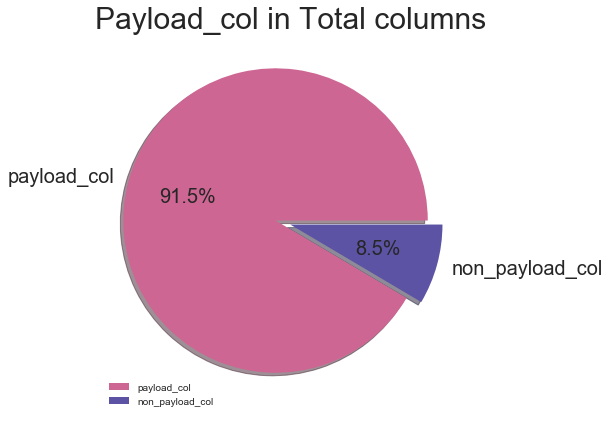

In [9]:
#visualization parameter setting
plt.rcParams['axes.labelsize']='x-large'
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize']=30
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = 7,7
all_colors=["#f3e79b","#fac484","#f8a07e","#eb7f86","#ce6693","#a059a0","#5c53a5"]
colors=["#ce6693","#5c53a5"]
size=[len(payload_col),len(non_payload_col)]
explode=[0.1,0]
labels=["payload_col","non_payload_col"]
startangle=360
plt.pie(size,explode=explode,colors=colors,labels=labels,startangle=startangle,autopct='%1.01f%%', shadow=True,textprops={'fontsize': 20});
plt.title("Payload_col in Total columns");
plt.legend();


In [10]:
#data types of the non payload
df[non_payload_col].dtypes

actor_login                      object
actor_attributes_email           object
repository_organization          object
repository_master_branch         object
url                              object
actor_attributes_blog            object
repository_has_wiki              object
repository_owner                 object
org_login                        object
actor                            object
org_avatar_url                   object
repository_has_downloads         object
repo_url                         object
repository_url                   object
repository_description           object
repository_size                 float64
repository_homepage              object
repository_id                   float64
actor_gravatar_id                object
repository_fork                  object
actor_attributes_location        object
actor_url                        object
repository_created_at            object
actor_attributes_login           object
org_id                          float64


## Working on identical columns having different column names

In [11]:
#checking repository related columns
repo_col = [col for col in df if col.startswith('repo')]
print(len(repo_col))

25


In [12]:
#columns starting with repository
repository_col=[col for col in df if col.startswith('repository')]
print(len(repository_col))

22


In [13]:
#columns starting with repo
only_repo=set(repo_col)-set(repository_col)
only_repo=list(only_repo)
print(only_repo)

['repo_url', 'repo_name', 'repo_id']


In [14]:
repository_col

['repository_id',
 'repository_name',
 'repository_url',
 'repository_description',
 'repository_watchers',
 'repository_stargazers',
 'repository_forks',
 'repository_fork',
 'repository_size',
 'repository_owner',
 'repository_private',
 'repository_open_issues',
 'repository_has_issues',
 'repository_has_downloads',
 'repository_has_wiki',
 'repository_language',
 'repository_created_at',
 'repository_pushed_at',
 'repository_master_branch',
 'repository_homepage',
 'repository_organization',
 'repository_integrate_branch']

In [15]:
# By observing we have three identical column pairs-
#{repo_id, repository_id}, {repo_name, repository_name},{repo_url,repository_url}

# viewing repo_id and repository_id

df_repos_id=df[["repo_id","repository_id"]]
#filling null values with 0
df_repos_id.fillna(0,inplace=True)
df_repos_id["repos_id"]=df_repos_id["repo_id"]+df_repos_id["repository_id"]
df_repos_id

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:4239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


repo_id  repository_id    repos_id
0            0.0            0.0         0.0
1      1340470.0            0.0   1340470.0
2      1359693.0            0.0   1359693.0
3      1119734.0            0.0   1119734.0
4      1421054.0            0.0   1421054.0
...          ...            ...         ...
14096        0.0     18125480.0  18125480.0
14097        0.0      2752836.0   2752836.0
14098        0.0     16710152.0  16710152.0
14099        0.0     18347806.0  18347806.0
14100        0.0      6251706.0   6251706.0

[14101 rows x 3 columns]

In [16]:
# viewing repo_name and repository_name
df_repos_name=df[["repo_name","repository_name"]]
df_repos_name.fillna("",inplace=True)
df_repos_name["repos_name"]=df_repos_name["repo_name"]+df_repos_name["repository_name"]

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
# viewing repo_url and repository_url 
df_repos_url=df[["repo_url","repository_url"]]
df_repos_url.fillna("",inplace=True)
df_repos_url["repos_url"]=df_repos_url["repo_url"]+df_repos_url["repository_url"]

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
df_repos_url.head()

repo_url repository_url  \
0                     https://api.github.dev/repos//                  
1  https://api.github.dev/repos/jmertic/KSU_Capst...                  
2      https://api.github.dev/repos/4poc/feedability                  
3       https://api.github.dev/repos/landseer/BBCode                  
4  https://api.github.dev/repos/cs0rbagomba/cpp_u...                  

                                           repos_url  
0                     https://api.github.dev/repos//  
1  https://api.github.dev/repos/jmertic/KSU_Capst...  
2      https://api.github.dev/repos/4poc/feedability  
3       https://api.github.dev/repos/landseer/BBCode  
4  https://api.github.dev/repos/cs0rbagomba/cpp_u...

In [19]:
#dropping the identical columns and replacing them with one merged column each and unnamed:0
df.drop(["repo_url","repository_url","repo_id","repository_id","repo_name","repository_name"],axis=1,inplace=True)
#adding merged columns
df["repo_id"]=df_repos_id["repos_id"]
df["repo_url"]=df_repos_url["repos_url"]
df["repo_name"]=df_repos_name["repos_name"]





In [20]:
#drop 'Unnamed: 0'
df.drop('Unnamed: 0',axis=1,inplace=True)

In [21]:
# checking actor identical columns
payload_col = [col for col in df if col.startswith('pay')]
df[payload_col]
print(len(payload_col))
non_payload_col=set(df.columns)-set(payload_col)
non_payload_col=list(non_payload_col)
print(len(non_payload_col))

538
46


In [22]:
#actor_details
actor_col = [col for col in df if col.startswith('actor')]
df[actor_col]
print(len(actor_col))

14


In [23]:

#actor_gravatar_id is junk- drop it
#retain actor_url
#drop actor_avatar_url
#Retain actor_login
#actor and actor_login are identical
#actor_attributes_login and actor are similar- need to check
#df['actor_attributes_login'].equals(df['actor'])
#actor_attributes_gravatar_id is junk
#actor_attributes_email is junk
#df.loc[df["actor_attributes_email"].isna()!=True].actor_attributes_email
df.drop(["actor_avatar_url","actor_attributes_login","actor_attributes_email","actor_gravatar_id","actor_attributes_gravatar_id"],inplace=True,axis=1)
#df.drop(["actor_gravatar_id"],inplace=True,axis=1)

In [24]:
#actor_details
actor_col = [col for col in df if col.startswith('actor')]
df[actor_col]
print((actor_col))

['actor_id', 'actor_url', 'actor_login', 'actor', 'actor_attributes_type', 'actor_attributes_name', 'actor_attributes_location', 'actor_attributes_company', 'actor_attributes_blog']


In [25]:
df[actor_col]
#actor and actor_login are identical
df_actor=df[["actor","actor_login"]]
df_actor.fillna("",inplace=True)

In [26]:
df_actor["actor_1"]=df_actor["actor_login"]+df_actor["actor"]




/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
#dropping both columns
df.drop(["actor","actor_login"],inplace=True,axis=1)

In [28]:
#adding new column
df["actor_login"]=df_actor["actor_1"]

In [29]:
#actor_details
actor_col = [col for col in df if col.startswith('actor')]
df[actor_col]
#df.drop("actor_1",inplace=True,axis=1)


actor_id                                    actor_url  \
0      392133.0  https://api.github.dev/users/errantepiphany   
1      606997.0        https://api.github.dev/users/cweybrec   
2      168797.0            https://api.github.dev/users/4poc   
3      343705.0      https://api.github.dev/users/hvorragend   
4      640615.0     https://api.github.dev/users/cs0rbagomba   
...         ...                                          ...   
14096       NaN                                          NaN   
14097       NaN                                          NaN   
14098       NaN                                          NaN   
14099       NaN                                          NaN   
14100       NaN                                          NaN   

      actor_attributes_type actor_attributes_name actor_attributes_location  \
0                       NaN                   NaN                       NaN   
1                       NaN                   NaN                       NaN   
2                       NaN                   NaN                       NaN   
3                       NaN                   NaN                       NaN   
4                       NaN                   NaN                       NaN   
...                     ...                   ...                       ...   
14096                  User  Luis Ricardo Sanchez                    Panama   
14097                  User            Mat Harden                    London   
14098                  User                   NaN                       NaN   
14099                  User                   NaN                       NaN   
14100                  User        Lucian Muresan         Erlangen, Germany   

      actor_attributes_company  actor_attributes_blog      actor_login  
0                          NaN                    NaN   errantepiphany  
1                          NaN                    NaN         cweybrec  
2                          NaN                    NaN             4poc  
3                          NaN                    NaN       hvorragend  
4                          NaN                    NaN      cs0rbagomba  
...                        ...                    ...              ...  
14096       eSphera Soluciones  espherasoluciones.com  luissanchez0305  
14097                Brainfire  twitter.com/matharden        matharden  
14098                      NaN                    NaN        T-RICH-92  
14099                      NaN                    NaN       jessicawan  
14100                      NaN                    NaN          lucianm  

[14101 rows x 8 columns]

In [30]:
#checking the columns again
non_payload_col=non_payload(df)

The non payload cols are 40


In [31]:
df[non_payload_col]

actor_login repository_organization repository_master_branch  \
0       errantepiphany                     NaN                      NaN   
1             cweybrec                     NaN                      NaN   
2                 4poc                     NaN                      NaN   
3           hvorragend                     NaN                      NaN   
4          cs0rbagomba                     NaN                      NaN   
...                ...                     ...                      ...   
14096  luissanchez0305                     NaN                   master   
14097        matharden                 hipchat                   master   
14098        T-RICH-92                     NaN                   master   
14099       jessicawan                     NaN                   master   
14100          lucianm                     NaN                   master   

                                                     url  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
14096  https://github.com/luissanchez0305/cochezWishl...   
14097           https://github.com/hipchat/hubot-hipchat   
14098  https://github.com/spenderg42/Android-Pentago/...   
14099  https://github.com/jessicawan/84a-sanchez/comp...   
14100  https://github.com/lucianm/gen2ovl-googoo2/com...   

       actor_attributes_blog repository_has_wiki repository_owner org_login  \
0                        NaN                 NaN              NaN       NaN   
1                        NaN                 NaN              NaN       NaN   
2                        NaN                 NaN              NaN       NaN   
3                        NaN                 NaN              NaN       NaN   
4                        NaN                 NaN              NaN       NaN   
...                      ...                 ...              ...       ...   
14096  espherasoluciones.com                True  luissanchez0305       NaN   
14097  twitter.com/matharden                True          hipchat       NaN   
14098                    NaN                True       spenderg42       NaN   
14099                    NaN                True       jessicawan       NaN   
14100                    NaN                True          lucianm       NaN   

      repository_has_downloads org_avatar_url  ... public repository_private  \
0                          NaN            NaN  ...   True                NaN   
1                          NaN            NaN  ...   True                NaN   
2                          NaN            NaN  ...   True                NaN   
3                          NaN            NaN  ...   True                NaN   
4                          NaN            NaN  ...   True                NaN   
...                        ...            ...  ...    ...                ...   
14096                     True            NaN  ...   True              False   
14097                     True            NaN  ...   True              False   
14098                     True            NaN  ...   True              False   
14099                     True            NaN  ...   True              False   
14100                     True            NaN  ...   True              False   

            repository_pushed_at repository_integrate_branch  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   
...                          ...                         ...   
14096  2014-04-01T16:04:43-07:0

In [32]:
df['repository_integrate_branch'].isna().sum()

13858

In [33]:
# repository_integrate_branch has a lot of null values, we can drop the column

df.drop("repository_integrate_branch",inplace=True,axis=1)


In [34]:
df['org_id'].isna().sum()

13670

In [35]:
#Similarly we can drop org_id and org_gravatar_url also
df.drop(["org_id", "org_gravatar_id","org_url","org_avatar_url"],inplace=True,axis=1)


In [36]:
#Exploring repository_description
df['repository_description'].isna().sum()


4942

In [37]:
len(df.repo_name.unique())


7055

In [38]:
non_payload_col=non_payload(df)

The non payload cols are 35


In [39]:
df[non_payload_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14101 entries, 0 to 14100
Data columns (total 35 columns):
actor_login                  14101 non-null object
repository_organization      4142 non-null object
repository_master_branch     11514 non-null object
url                          11695 non-null object
actor_attributes_blog        4958 non-null object
repository_has_wiki          11514 non-null object
repository_owner             11514 non-null object
org_login                    431 non-null object
repository_has_downloads     11514 non-null object
repo_url                     14101 non-null object
repository_description       9159 non-null object
repository_size              11514 non-null float64
repository_homepage          3144 non-null object
repository_fork              11514 non-null object
actor_attributes_location    5846 non-null object
actor_url                    2406 non-null object
repository_created_at        11514 non-null object
repo_name                    14

In [40]:
df[payload_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14101 entries, 0 to 14100
Columns: 538 entries, payload_ref_type to payload_pull_request_head_repo
dtypes: float64(73), object(465)
memory usage: 57.9+ MB


In [41]:
!pwd


/Users/vinatigattupalli/Github_Classification


In [42]:
df[payload_col].to_excel("/Users/vinatigattupalli/Documents/DataSets/payload.xlsx")

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:931: UserWarning: Ignoring URL 'https://jira.ets.berkeley.edu/jira/browse/CLC-3487

The%20title%20of%20this%20jira%20has%20been%20changed.%20It%20used%20to%20say%20%22should%20see%20the%20pseudo-user's%20last%20log-in%20status%20in%20the%20view-as%20footer%22,%20but%20that%20was%20misleading%20because%20we%20don't%20have%20access%20to%20that%20information%20at%20this%20point%20in%20time.

What's%20really%20being%20shown%20is%20the%20date%20of%20the%20user's%20first%20log%20in.' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:931: UserWarning: Ignoring URL 'https://jira.ets.berkeley.edu/jira/browse/CLC-3487

The%20title%20of%20this%20jira%20has%20been%20changed.%20It%20used%20to%20say%20%22should%20see%20the%20pseudo-user's%20last%20log-in%20status%20in%20the%20view-as%20footer%22,%20

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/jhenahan/ohaskell-translations/git/refs%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/prometheus/promdash/git/refs%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/jippi/cakephp-test-utilities/git/refs%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/cloudfoundry/cf-release/statuses/%7bsha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/twbs/bootstrap/statuses/%7bsha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/twitter/kestrel-client/statuses/%7bsha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/Panteleyev/otohoshi.github.io/stargazers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/misterbisson/bcms/stargazers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/google/traceur-compiler/stargazers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/rubinius/rubin

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/NetLogo/Galapagos/subscribers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/lookout/lookout-rack-test/subscribers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/asirnayeef23/asirnayeef23.github.io/subscribers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/Dar

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/Daenks/Meridian59_103/commits%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/mozilla/socorro/commits%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/iShift/twister-webkit/commits%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/OVALP

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/trainerbill/PayPalPaymentsProLite/comments%7b/number%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/web-animations/web-animations-spec/comments%7b/number%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/krakenjs/engine-munger/comments%7b/number%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Igno

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/trainerbill/PayPalPaymentsProLite/contents/%7b+path%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/web-animations/web-animations-spec/contents/%7b+path%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/krakenjs/engine-munger/contents/%7b+path%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignorin

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/dimagi/commcare-hq/merges' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/quattor/quattor.github.com/merges' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/omanor/PIPredictor/merges' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/BellevueCollege/gravityforms-exte

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/cfpb/cf-typography/downloads' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/MinecraftForge/MinecraftForge/downloads' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/smh/checkdigit/downloads' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/maptime/postgis-101/downl

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/cfpb/cf-typography/pulls%7b/number%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/MinecraftForge/MinecraftForge/pulls%7b/number%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/smh/checkdigit/pulls%7b/number%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repo

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/cfpb/cf-typography/notifications%7b?since,all,participating%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/MinecraftForge/MinecraftForge/notifications%7b?since,all,participating%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/smh/checkdigit/notifications%7b?since,all,participating%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwrit

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/cfpb/cf-typography/releases%7b/id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/MinecraftForge/MinecraftForge/releases%7b/id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/smh/checkdigit/releases%7b/id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/m

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/cfpb/cf-typography.git' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/MinecraftForge/MinecraftForge.git' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/smh/checkdigit.git' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/maptime/postgis-101.git' since it exceeds Excel's limit of 65,530 URLS per workshee

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/cfpb/cf-typography/pulls/6' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/MinecraftForge/MinecraftForge/pulls/754' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/smh/checkdigit/pulls/1' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/maptime/postgis-101/pulls/1' 

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/Genability/genability-java/pull/6' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/xtuple/xtuple/pull/1355' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/PrinterLUA/FORGOTTENSERVER-ORTS/pull/288' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/jefferis/nat/pull/70' since it exceeds Excel's limit of 65,5

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/grossma6/mywebsite/issues/54/comments' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/mikeastock/betterfriendbot/issues/1/comments' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/swcarpentry/bc/issues/403/comments' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/e

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/emonti/rbkb/pulls/comments/%7bnumber%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/aspire-public-schools/reader-tool/pulls/comments/%7bnumber%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/dchester/epilogue/pulls/comments/%7bnumber%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL '

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/G5/g5-hub/statuses/6b3558cbb8735c7febc85b63b469a1c9a21db655' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/G5/g5-hub/statuses/2efa78ee64ef3ff246270aef3fe34a8550ac0e12' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/segmentio/metalsmith-permalinks/statuses/ebd145b32bf06fb6826a975330d3a542725a15b6' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xl

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/1044670?' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/36124?' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/30171?' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/1234645?' since it exceeds Excel's limit of 65,530 U

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/BenFradet' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/ejzn' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/computmaxer' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/tw-shpark' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per w

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/coryb/followers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/robn/followers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/DavertMik/followers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/minrk/followers' since it exceeds Excel's limit of 65,530 URLS per w

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/nathantross/starred%7b/owner%7d%7b/repo%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/aquaopaque/starred%7b/owner%7d%7b/repo%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/vonrosen/starred%7b/owner%7d%7b/repo%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/mihneadb/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/martint/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/Medo42/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/AveVlad/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/Scotchester/received_events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/smh/received_events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/dougm/received_events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/ziggimon/received_events' since it exceeds Excel'

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/Neamar/corporate/pulls/comments/11184580' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/lainventoria/cp/pulls/comments/11184592' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/Neamar/corporate/pulls/comments/11184596' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/rep

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/536844?' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/142792?' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/136776?' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/641278?' since it exceeds Excel's limit of 65,530 U

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/Neamar/followers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/mauriciopasquier/followers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/Kijewski/followers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/rmcgibbo/followers' since it exceeds Excel's limit of 65

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/Neamar/subscriptions' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/mauriciopasquier/subscriptions' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/Kijewski/subscriptions' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/rmcgibbo/subscriptions' since it exceeds Exc

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/Neamar/received_events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/mauriciopasquier/received_events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/Kijewski/received_events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/rmcgibbo/received_events' since it exc

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'http://css-tricks.com/snippets/css/a-guide-to-flexbox/
should%20help%20you%20avoid%20using%20%60resize%60%20events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/Neamar/corporate/pull/61' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/lainventoria/cp/pull/101' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/RIOT-OS/RIOT/

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/Neamar/corporate/pulls/61' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/lainventoria/cp/pulls/101' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/RIOT-OS/RIOT/pulls/961' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/rmcgibbo/mixtape/pulls/91' since it exceeds 

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/shyambhat/InstagramKit/releases/252019' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/busterjs/lt-instabuster/releases/252021' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/Graylog2/graylog2-web-interface/releases/252006' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.co

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/shyambhat/InstagramKit/releases/tag/3.1.0' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/busterjs/lt-instabuster/releases/tag/0.0.5' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/Graylog2/graylog2-web-interface/releases/tag/0.20.2-snapshot' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/DMBuce/clicra

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/shyambhat' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/rundis' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/lennartkoopmann' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/DMBuce' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/ana

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/AeroEchelon/gists%7b/gist_id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/d33d/gists%7b/gist_id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/mrbelvedere/gists%7b/gist_id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/mattyjones/gists%7b/gist_id%7d

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/AeroEchelon/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/d33d/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/mrbelvedere/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/mattyjones/orgs' since it exceeds Excel's limit of 65,530 URLS per workshee

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/shyambhat/InstagramKit/tarball/3.1.0' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/busterjs/lt-instabuster/tarball/0.0.5' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/Graylog2/graylog2-web-interface/tarball/0.20.2-snapshot' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.githu

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/teams/445520' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/teams/713823' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/teams/761638' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/teams/761641' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet.

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/1187385?' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/5882573?' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/6991470?' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://avatars.githubusercontent.com/u/7130529?' since it exceeds Excel's limit of 65,5

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/junyoed' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/nrmldotcom' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/reddcoin-project' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/BlueHerons' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/junyoed/gists%7b/gist_id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/nrmldotcom/gists%7b/gist_id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/reddcoin-project/gists%7b/gist_id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/BlueHerons/gists%7b/gis

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/junyoed/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/nrmldotcom/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/reddcoin-project/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/BlueHerons/orgs' since it exceeds Excel's limit of 65,530 URLS per w

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/junyoed/received_events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/nrmldotcom/received_events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/reddcoin-project/received_events' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/BlueHerons/received_events' since i

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotcom/braintree_ios' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin-project.git

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/pallet/mongodb-crate/keys%7b/key_id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/proyectoSuchai/gsSuchai/keys%7b/key_id%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/collaborators%7b/collaborator%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'htt

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/frogbywyplay/genbox_portage/hooks' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/frogbywyplay/genbox_xintegtools/hooks' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/pallet/mongodb-crate/hooks' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/proyectoSuchai/gsSuc

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/branches%7b/branch%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotcom/braintree_ios/branches%7b/branch%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin/branches%7b/branch%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL '

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/git/tags%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotcom/braintree_ios/git/tags%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin/git/tags%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://a

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/statuses/%7bsha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotcom/braintree_ios/statuses/%7bsha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin/statuses/%7bsha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://a

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/pallet/mongodb-crate/stargazers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/proyectoSuchai/gsSuchai/stargazers' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/contributors' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotc

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/commits%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotcom/braintree_ios/commits%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin/commits%7b/sha%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/issues/comments/%7bnumber%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotcom/braintree_ios/issues/comments/%7bnumber%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin/issues/comments/%7bnumber%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWa

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/merges' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotcom/braintree_ios/merges' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin/merges' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/issues%7b/number%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotcom/braintree_ios/issues%7b/number%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin/issues%7b/number%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https:

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/junyoed/heroku-buildpack-multi/notifications%7b?since,all,participating%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nrmldotcom/braintree_ios/notifications%7b?since,all,participating%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/reddcoin-project/reddcoin/notifications%7b?since,all,participating%7d' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/junyoed/heroku-buildpack-multi.git' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/nrmldotcom/braintree_ios.git' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/reddcoin-project/reddcoin.git' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://github.com/reddcoin-project/reddcoin-project.github.io.git' since it exceeds

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/nasa-gibs/onearth/milestones/1' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/AutoMapper/AutoMapper/milestones/8' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/mozilla/persona/milestones/26' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/repos/fernandokosh/redmine_ti

/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/delaitre/orgs' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/jbogard/repos' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/6a68/repos' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "65,530 URLS per worksheet." % force_unicode(url))
/anaconda2/envs/py36/lib/python3.6/site-packages/xlsxwriter/worksheet.py:939: UserWarning: Ignoring URL 'https://api.github.com/users/delaitre/repos' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  "

In [43]:
df.drop(columns= payload_col,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14101 entries, 0 to 14100
Data columns (total 35 columns):
type                         14101 non-null object
public                       14101 non-null bool
created_at                   14101 non-null object
id                           2406 non-null float64
actor_id                     2399 non-null float64
actor_url                    2406 non-null object
org_login                    431 non-null object
url                          11695 non-null object
actor_attributes_type        11604 non-null object
repository_description       9159 non-null object
repository_watchers          11514 non-null float64
repository_stargazers        11514 non-null float64
repository_forks             11514 non-null float64
repository_fork              11514 non-null object
repository_size              11514 non-null float64
repository_owner             11514 non-null object
repository_private           11514 non-null object
repository_open_issues    

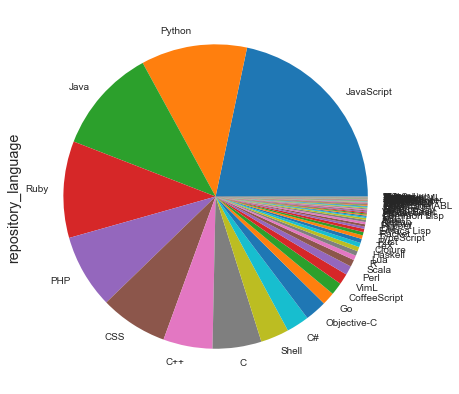

In [45]:
df.repository_language.value_counts().plot.pie();

In [46]:
len(df.repository_language.unique())

81

In [47]:
df.repository_language.isnull().count()

14101

In [48]:
df.shape

(14101, 35)

## Scrubbing the data

In [49]:
df.dtypes

type                          object
public                          bool
created_at                    object
id                           float64
actor_id                     float64
actor_url                     object
org_login                     object
url                           object
actor_attributes_type         object
repository_description        object
repository_watchers          float64
repository_stargazers        float64
repository_forks             float64
repository_fork               object
repository_size              float64
repository_owner              object
repository_private            object
repository_open_issues       float64
repository_has_issues         object
repository_has_downloads      object
repository_has_wiki           object
repository_language           object
repository_created_at         object
repository_pushed_at          object
repository_master_branch      object
actor_attributes_name         object
actor_attributes_location     object
r

In [50]:
df.dtypes.value_counts()

object     26
float64     8
bool        1
dtype: int64

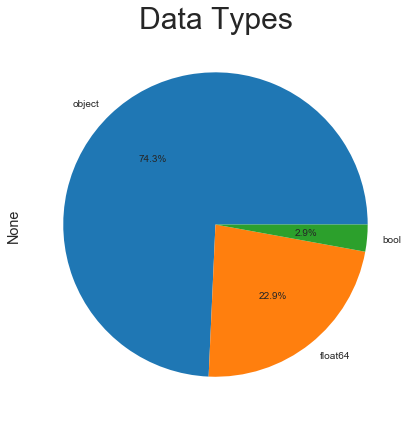

In [51]:
df.dtypes.value_counts().plot.pie(title="Data Types",autopct='%1.01f%%')

In [52]:
df.select_dtypes(include="bool")

public
0        True
1        True
2        True
3        True
4        True
...       ...
14096    True
14097    True
14098    True
14099    True
14100    True

[14101 rows x 1 columns]

In [53]:
df.public.value_counts()

True    14101
Name: public, dtype: int64

### All the values in public are true, this feature is not useful so delete it

In [54]:
df.drop(['public','id','actor_id','repo_id'],axis=1,inplace=True)

In [55]:
df.dtypes.value_counts()

object     26
float64     5
dtype: int64

In [56]:
df.select_dtypes(include="object")

type                 created_at  \
0            DeleteEvent       2011-03-01T15:00:00Z   
1              PushEvent       2011-03-01T15:00:01Z   
2              PushEvent       2011-03-01T15:00:01Z   
3              PushEvent       2011-03-01T15:00:02Z   
4              PushEvent       2011-03-01T15:00:04Z   
...                  ...                        ...   
14096          PushEvent  2014-04-01T16:04:43-07:00   
14097         WatchEvent  2014-04-01T16:04:43-07:00   
14098  IssueCommentEvent  2014-04-01T16:04:43-07:00   
14099          PushEvent  2014-04-01T16:04:43-07:00   
14100          PushEvent  2014-04-01T16:04:42-07:00   

                                         actor_url org_login  \
0      https://api.github.dev/users/errantepiphany       NaN   
1            https://api.github.dev/users/cweybrec       NaN   
2                https://api.github.dev/users/4poc       NaN   
3          https://api.github.dev/users/hvorragend       NaN   
4         https://api.github.dev/users/cs0rbagomba       NaN   
...                                            ...       ...   
14096                                          NaN       NaN   
14097                                          NaN       NaN   
14098                                          NaN       NaN   
14099                                          NaN       NaN   
14100                                          NaN       NaN   

                                                     url  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
14096  https://github.com/luissanchez0305/cochezWishl...   
14097           https://github.com/hipchat/hubot-hipchat   
14098  https://github.com/spenderg42/Android-Pentago/...   
14099  https://github.com/jessicawan/84a-sanchez/comp...   
14100  https://github.com/lucianm/gen2ovl-googoo2/com...   

      actor_attributes_type  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                       NaN   
...                     ...   
14096                  User   
14097                  User   
14098                  User   
14099                  User   
14100                  User   

                                  repository_description repository_fork  \
0                                                    NaN             NaN   
1                                                    NaN             NaN   
2                                                    NaN             NaN   
3                                                    NaN             NaN   
4                                                    NaN             NaN   
...                                                  ...             ...   
14096                        Wishlist de Cochez & Cochez           False   
14097                 HipChat adapter for GitHub's Hubot           False   
14098                          Android Development, 2014           False   
14099                                     Rent our house           False   
14100  My Gentoo overlay with ebuilds related to VDR ...           False   

      repository_owner repository_private  ... repository_master_branch  \
0                  NaN                NaN  ...                      NaN   
1                  NaN                NaN  ...                      NaN   
2                  NaN                NaN  ...                      NaN   
3                  NaN                NaN  ...                      NaN   
4                  NaN                NaN  ...                      NaN   
...                ...                ...  ...                      ...   
14096  luissanchez0305              False  ...            

In [57]:
df.select_dtypes(include="float").head(10)

repository_watchers  repository_stargazers  repository_forks  \
0                  NaN                    NaN               NaN   
1                  NaN                    NaN               NaN   
2                  NaN                    NaN               NaN   
3                  NaN                    NaN               NaN   
4                  NaN                    NaN               NaN   
5                  NaN                    NaN               NaN   
6                  NaN                    NaN               NaN   
7                  NaN                    NaN               NaN   
8                  NaN                    NaN               NaN   
9                  NaN                    NaN               NaN   

   repository_size  repository_open_issues  
0              NaN                     NaN  
1              NaN                     NaN  
2              NaN                     NaN  
3              NaN                     NaN  
4              NaN                     NaN  
5              NaN                     NaN  
6              NaN                     NaN  
7              NaN                     NaN  
8              NaN                     NaN  
9              NaN                     NaN

In [58]:
df.select_dtypes(include="float").isnull().sum()


repository_watchers       2587
repository_stargazers     2587
repository_forks          2587
repository_size           2587
repository_open_issues    2587
dtype: int64

In [59]:
total_number_of_cells = df.size
null_cells_for_float_type=df.select_dtypes(include="float").isnull().sum()

Pecentage=(null_cells_for_float_type/total_number_of_cells)*100

In [60]:
df_median=df.select_dtypes(include="float").fillna(df.select_dtypes(include="float").median())

In [61]:
df_median.isnull().sum()

repository_watchers       0
repository_stargazers     0
repository_forks          0
repository_size           0
repository_open_issues    0
dtype: int64

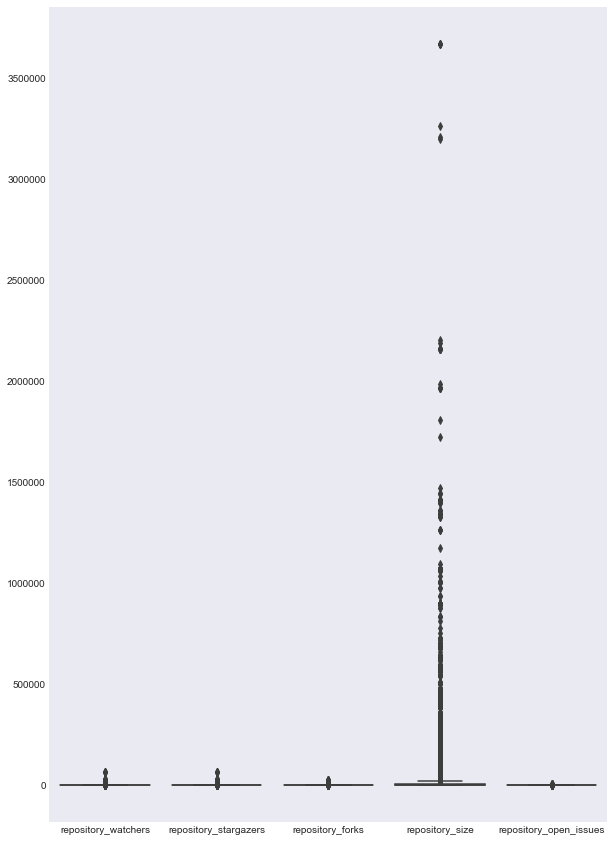

In [62]:
#exploratory data analysis
plt.figure(figsize=(10,15))
sns.boxplot(data=df_median)

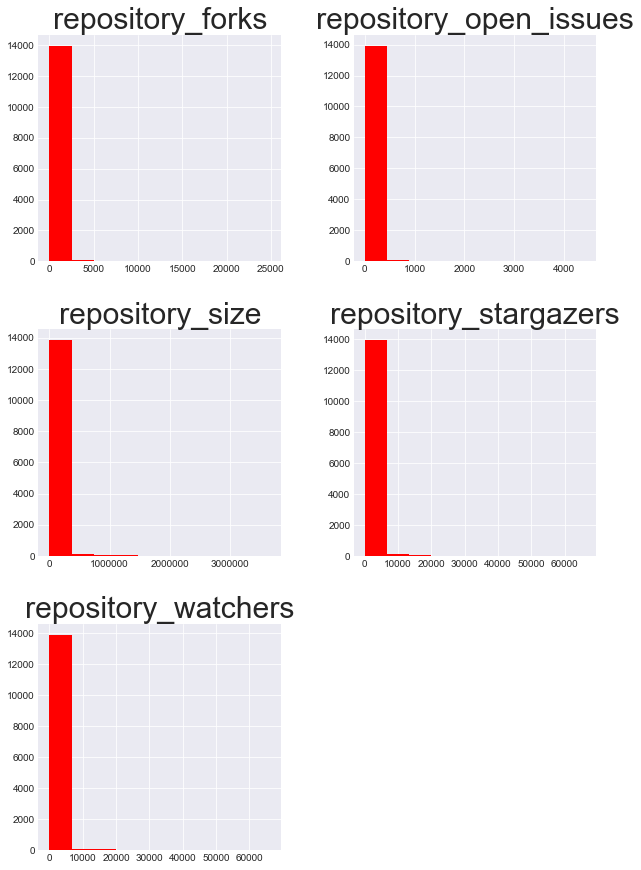

In [63]:
df_median.hist(figsize=(10,15),color=['red'],bins=10);

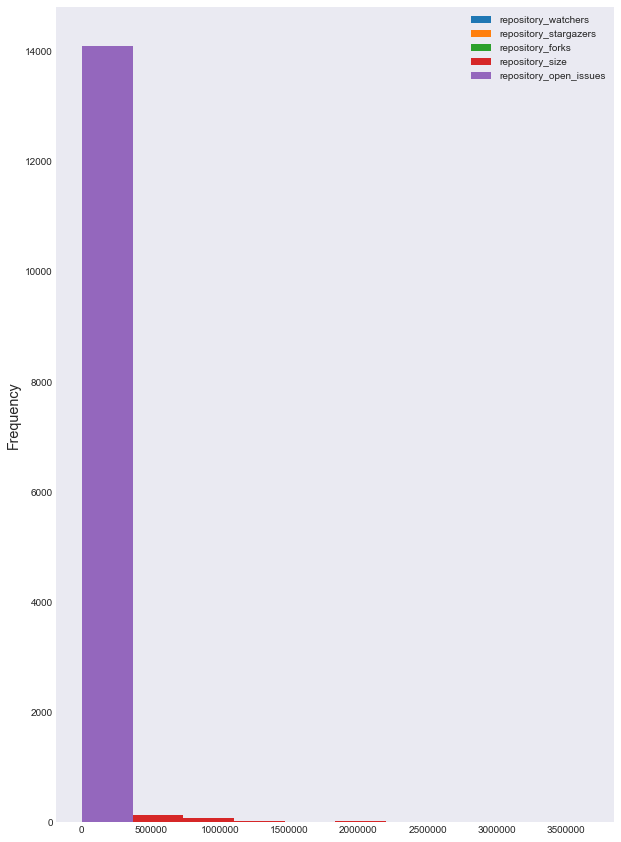

In [64]:
df_median.plot.hist(figsize=(10,15))

In [65]:
df_median.describe()

repository_watchers  repository_stargazers  repository_forks  \
count         14101.000000           14101.000000      14101.000000   
mean            411.207078             411.207078        110.012127   
std            2166.131585            2166.131585        749.627414   
min               0.000000               0.000000          0.000000   
25%               0.000000               0.000000          0.000000   
50%               1.000000               1.000000          0.000000   
75%              16.000000              16.000000          6.000000   
max           66275.000000           66275.000000      24915.000000   

       repository_size  repository_open_issues  
count     1.410100e+04            14101.000000  
mean      3.419001e+04               24.084108  
std       1.546339e+05              154.166084  
min       0.000000e+00                0.000000  
25%       2.100000e+02                0.000000  
50%       1.452000e+03                0.000000  
75%       8.301000e+03                3.000000  
max       3.667436e+06             4435.000000

In [66]:
df_int=df_median.astype('int')

In [67]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14101 entries, 0 to 14100
Data columns (total 5 columns):
repository_watchers       14101 non-null int64
repository_stargazers     14101 non-null int64
repository_forks          14101 non-null int64
repository_size           14101 non-null int64
repository_open_issues    14101 non-null int64
dtypes: int64(5)
memory usage: 550.9 KB


In [68]:
df[["repository_forks","repository_stargazers","repository_open_issues","repository_size","repository_watchers"]]=df_int[["repository_forks","repository_stargazers","repository_open_issues","repository_size","repository_watchers"]]

In [69]:
df.isnull().sum()

type                             0
created_at                       0
actor_url                    11695
org_login                    13670
url                           2406
actor_attributes_type         2497
repository_description        4942
repository_watchers              0
repository_stargazers            0
repository_forks                 0
repository_fork               2587
repository_size                  0
repository_owner              2587
repository_private            2587
repository_open_issues           0
repository_has_issues         2587
repository_has_downloads      2587
repository_has_wiki           2587
repository_language           4411
repository_created_at         2587
repository_pushed_at          2589
repository_master_branch      2587
actor_attributes_name         6045
actor_attributes_location     8255
repository_homepage          10957
repository_organization       9959
actor_attributes_company     10414
actor_attributes_blog         9143
repo_url            

In [70]:
df_object=df.select_dtypes(include="object")

In [71]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14101 entries, 0 to 14100
Data columns (total 26 columns):
type                         14101 non-null object
created_at                   14101 non-null object
actor_url                    2406 non-null object
org_login                    431 non-null object
url                          11695 non-null object
actor_attributes_type        11604 non-null object
repository_description       9159 non-null object
repository_fork              11514 non-null object
repository_owner             11514 non-null object
repository_private           11514 non-null object
repository_has_issues        11514 non-null object
repository_has_downloads     11514 non-null object
repository_has_wiki          11514 non-null object
repository_language          9690 non-null object
repository_created_at        11514 non-null object
repository_pushed_at         11512 non-null object
repository_master_branch     11514 non-null object
actor_attributes_name        

In [72]:
df_object.isnull().sum()

type                             0
created_at                       0
actor_url                    11695
org_login                    13670
url                           2406
actor_attributes_type         2497
repository_description        4942
repository_fork               2587
repository_owner              2587
repository_private            2587
repository_has_issues         2587
repository_has_downloads      2587
repository_has_wiki           2587
repository_language           4411
repository_created_at         2587
repository_pushed_at          2589
repository_master_branch      2587
actor_attributes_name         6045
actor_attributes_location     8255
repository_homepage          10957
repository_organization       9959
actor_attributes_company     10414
actor_attributes_blog         9143
repo_url                         0
repo_name                        0
actor_login                      0
dtype: int64

In [73]:
number_of_null_cells=df_object.isnull().sum()
Percentage_object_all_cells=(number_of_null_cells/total_number_of_cells)*100

In [74]:
Percentage_object_columnwise=(number_of_null_cells/df.shape[0])*100

In [75]:
Percentage_object_all_cells

type                         0.000000
created_at                   0.000000
actor_url                    2.675399
org_login                    3.127209
url                          0.550407
actor_attributes_type        0.571225
repository_description       1.130554
repository_fork              0.591813
repository_owner             0.591813
repository_private           0.591813
repository_has_issues        0.591813
repository_has_downloads     0.591813
repository_has_wiki          0.591813
repository_language          1.009080
repository_created_at        0.591813
repository_pushed_at         0.592271
repository_master_branch     0.591813
actor_attributes_name        1.382881
actor_attributes_location    1.888450
repository_homepage          2.506571
repository_organization      2.278264
actor_attributes_company     2.382352
actor_attributes_blog        2.091593
repo_url                     0.000000
repo_name                    0.000000
actor_login                  0.000000
dtype: float

In [76]:
Percentage_object_columnwise

type                          0.000000
created_at                    0.000000
actor_url                    82.937380
org_login                    96.943479
url                          17.062620
actor_attributes_type        17.707964
repository_description       35.047160
repository_fork              18.346217
repository_owner             18.346217
repository_private           18.346217
repository_has_issues        18.346217
repository_has_downloads     18.346217
repository_has_wiki          18.346217
repository_language          31.281469
repository_created_at        18.346217
repository_pushed_at         18.360400
repository_master_branch     18.346217
actor_attributes_name        42.869300
actor_attributes_location    58.541947
repository_homepage          77.703709
repository_organization      70.626197
actor_attributes_company     73.852918
actor_attributes_blog        64.839373
repo_url                      0.000000
repo_name                     0.000000
actor_login              

In [77]:
#Delete the columns which have more than 50 percent missing data and deleting url, becos it is of least prominance

df.drop(['actor_url','org_login','repository_homepage','repository_organization','actor_attributes_company','actor_attributes_blog','actor_attributes_location','url'],axis=1,inplace=True)

In [78]:
df_object=df.select_dtypes(include="object")

In [79]:
number_of_null_cells=df_object.isnull().sum()

In [80]:
Percentage_object_columnwise=(number_of_null_cells/df.shape[0])*100

In [81]:
Percentage_object_columnwise

type                         0.000000
created_at                   0.000000
actor_attributes_type       17.707964
repository_description      35.047160
repository_fork             18.346217
repository_owner            18.346217
repository_private          18.346217
repository_has_issues       18.346217
repository_has_downloads    18.346217
repository_has_wiki         18.346217
repository_language         31.281469
repository_created_at       18.346217
repository_pushed_at        18.360400
repository_master_branch    18.346217
actor_attributes_name       42.869300
repo_url                     0.000000
repo_name                    0.000000
actor_login                  0.000000
dtype: float64

# Identifying the type of variable
## 1.type- 

## df['type'].value_counts().count()

## Type is categorical

## created_at

## created_at is time, it is a continuous variable, we need to convert it to datetime64[ns] format.

## 2.actor_attributes_type
## df['actor_attributes_type'].value_counts()

## actor_attributes_type has categories, two categorical variables

## 3.repository_description it is a string data type and can be object dtype in pandas

## 4.repository_fork

## df['repository_fork'].value_counts()

## repository_fork is a True or False category.Should be converted into binary 0 or 1.It will be a bool data type

## 5.repository_owner
## df['repository_owner'].value_counts().count()

## Repository owner is the name of the repository owner.We have a transactional data set so there can be many  transactions of a particular repository owner. It becomes a categorical variable with thousands of categories.

## As of now we put it as a object or string variable.

## 6.repository_private

## df['repository_private'].value_counts()

## repository_private says if a repository is private or no . It has only one false value can have many values in the future. Convert into bool.


## 7.repository_has_issues
## df['repository_has_issues'].value_counts()
##  repository_has_issues says if a repository has issues or no. It has true or false value. Convert to bool.

## 8.repository_has_downloads
## df['repository_has_downloads'].value_counts()
# repository_has_downloads says if a repository has downloads or no. It has true or false value. Convert to bool.

## 9.repository_language
## df['repository_language'].value_counts().count()
## repository_language has says in which language the code is written. We will convert it to categorical variables.
## It has about 80 different variables

## 10.repository_created_at
## df['repository_created_at'].isnull().sum()
## repository_created_at gives the time information about time at which the repo was created.

## 11.repository_pushed_at
## gives the information when the changes have been made into the repository and needs to be converted as time dtyoe

## 12.repository_master_branch
## df['repository_master_branch'].value_counts()
## repository_master_branch gives information about the branch of the repository.It has 80 different categories and needs to be converted as a categorical variable

## 13.actor_attributes_name
## df['actor_attributes_name'].value_counts()

## actor_attributes_name is the name of the actor doing this transaction. they are actually nominal variables.But since this is a transactional data it is becoming categotical.I decide to convert it into categorical variable

## 14.repo_url

## repo_url is the repository url. We can put this as object type.

## 15.repo_name
## df['repo_name'].value_counts().count()

## repo_name is the name of the repository. We will convert it into categorical variable.

## 16.actor_login

## df['actor_login'].value_counts()

## actor_login is the login id of the actors. I convert this into categorical variable




In [82]:
# Conversion of dtypes of object variables into categorical
df['type']=df.type.astype("category")    
df.type.dtype

CategoricalDtype(categories=['CommitCommentEvent', 'CreateEvent', 'DeleteEvent',
                  'DownloadEvent', 'FollowEvent', 'ForkApplyEvent',
                  'ForkEvent', 'GistEvent', 'GollumEvent', 'IssueCommentEvent',
                  'IssuesEvent', 'MemberEvent', 'PublicEvent',
                  'PullRequestEvent', 'PullRequestReviewCommentEvent',
                  'PushEvent', 'ReleaseEvent', 'TeamAddEvent', 'WatchEvent'],
                 ordered=False)

In [98]:
# Conversion of dtypes to categories
df[['actor_attributes_type','repository_owner','repository_language','repository_master_branch','actor_attributes_name',
   'repo_name','actor_login']]=df[['actor_attributes_type','repository_owner','repository_language','repository_master_branch','actor_attributes_name',
   'repo_name','actor_login']].astype('category')    
       




In [100]:
df.repository_master_branch.dtype

CategoricalDtype(categories=['0.20', '0.3', '0.4', '0.6.0', '1.0-branch', '1.1.x', '1.8',
                  '2.1', '2.3/develop', '2.6',
                  ...
                  'v160', 'v2.1.9', 'v2_arbor', 'v3-stable', 'v3.0', 'vanir',
                  'weekly', 'wmm', 'wyplay-2.1.4', 'xlnx/master-rebase'],
                 ordered=False)

In [85]:
# repository_private          
# repository_has_issues       
# repository_has_downloads 
# repository_has_wiki    

In [101]:
#conversion to bool
df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki','repository_fork']]=df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki','repository_fork']].astype(bool)


In [102]:
df.repository_has_issues.dtype

dtype('bool')

In [88]:
#'actor_attributes_type','repository_language','repository_master_branch'

In [ ]:
#'repository_owner','actor_attributes_name',actor_login,repo_name

In [115]:
# Filling the missing categorical values using mode
mode=df[['actor_attributes_type','repository_master_branch','repository_language']].mode()

In [116]:
df[['actor_attributes_type','repository_master_branch','repository_language']]=df[['actor_attributes_type','repository_master_branch','repository_language']].fillna(mode.iloc[0])

In [118]:
df['actor_attributes_type'].value_counts()

User            13945
Organization      156
Name: actor_attributes_type, dtype: int64

In [119]:
# Filling the missing boolean values with mode
mode_bool=df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki']].mode()
df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki']]=df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki']].fillna(mode.iloc[0])

In [122]:
#repository_owner, actor_attributes_name,actor_login,repo_name they seem similar
df_object[["repository_owner", "actor_attributes_name","actor_login","repo_name","type","repository_description","repository_master_branch"]]

repository_owner actor_attributes_name      actor_login  \
0                  NaN                   NaN   errantepiphany   
1                  NaN                   NaN         cweybrec   
2                  NaN                   NaN             4poc   
3                  NaN                   NaN       hvorragend   
4                  NaN                   NaN      cs0rbagomba   
...                ...                   ...              ...   
14096  luissanchez0305  Luis Ricardo Sanchez  luissanchez0305   
14097          hipchat            Mat Harden        matharden   
14098       spenderg42                   NaN        T-RICH-92   
14099       jessicawan                   NaN       jessicawan   
14100          lucianm        Lucian Muresan          lucianm   

                                  repo_name               type  \
0                                         /        DeleteEvent   
1      jmertic/KSU_Capstone_Spring_2011_PHP          PushEvent   
2                          4poc/feedability          PushEvent   
3                           landseer/BBCode          PushEvent   
4                     cs0rbagomba/cpp_utils          PushEvent   
...                                     ...                ...   
14096                        cochezWishlist          PushEvent   
14097                         hubot-hipchat         WatchEvent   
14098                       Android-Pentago  IssueCommentEvent   
14099                           84a-sanchez          PushEvent   
14100                       gen2ovl-googoo2          PushEvent   

                                  repository_description  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
14096                        Wishlist de Cochez & Cochez   
14097                 HipChat adapter for GitHub's Hubot   
14098                          Android Development, 2014   
14099                                     Rent our house   
14100  My Gentoo overlay with ebuilds related to VDR ...   

      repository_master_branch  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
14096                   master  
14097                   master  
14098                   master  
14099                   master  
14100                   master  

[14101 rows x 7 columns]

In [ ]:
#actor_login can be used to replace null values in actor_attributes_name
#df.actor_attributes_name.fillna(df.actor_login)
df.actor_attributes_name = np.where(df.actor_attributes_name.isnull(), df.actor_login, df.actor_attributes_name)

#repository_owner and repo_name can help each other in filling their null values
df.repository_owner = np.where(df.repository_owner.isnull(), df.repo_name, df.repository_owner)




In [144]:
def percentage_missing_values_dtype(df,Dtype):
    df_object=df.select_dtypes(include=Dtype)
    number_of_null_cells=df_object.isnull().sum()
    Percentage_object_columnwise=(number_of_null_cells/df.shape[0])*100
    return Percentage_object_columnwise

In [163]:
Percentage_object_columnwise=percentage_missing_values_dtype(df,("int"))


In [162]:
Percentage_object_columnwise

Series([], dtype: float64)